# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

## 💪 Competition challenge
Create a report that covers the following:

1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.

In [69]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('colorblind')

In [70]:
#Load dataset
raw_data = pd.read_csv('data/abalone.csv')

#View the first five observations
raw_data.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [71]:
#Check out the data
print(raw_data.info())

#Summary of the data
raw_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB
None


,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000


**Observations**
* The count of the features are the same (4177), which means there are no missing values
* The numerical data are either float or int and we have only one categorical feature which already had a dtype object, which means all the features are in their right type

In [72]:

#Creating a checkpoint

data = raw_data.copy()


# Exploratory data analysis

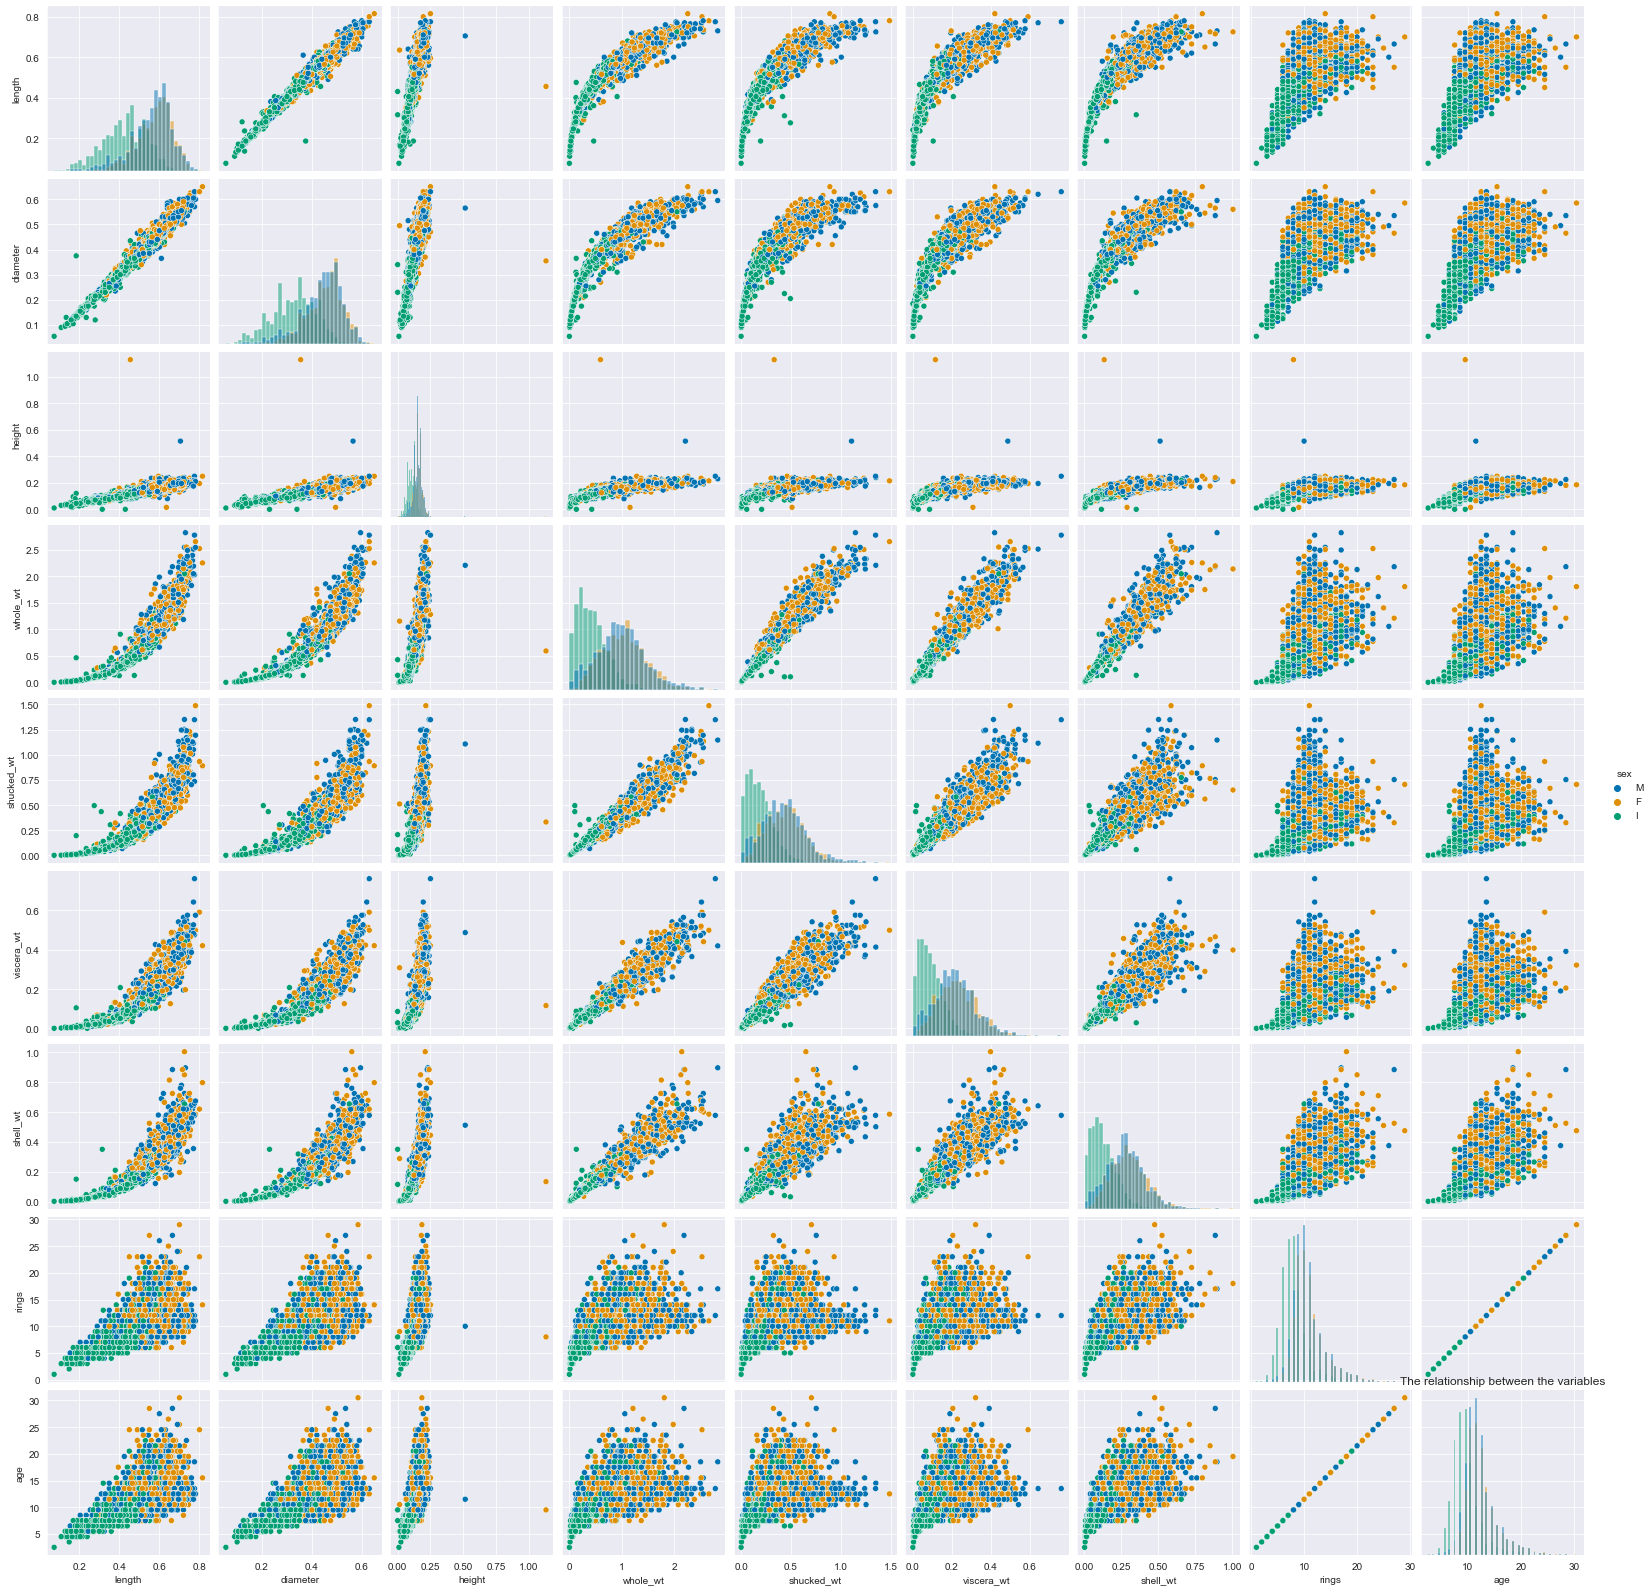

In [73]:
#Visualizing the relationship between features
sns.pairplot(
             data=data,
             vars=['length', 'diameter', 'height', 'whole_wt', 'shucked_wt','viscera_wt', 'shell_wt',                                  'rings', 'age'],
             hue='sex',
             kind='scatter',
             diag_kind='hist'

)
plt.title('The relationship between the variables')
plt.show()

**Observations**
* We see clearly, how each pairs of features in the data relate with each other, this is a very important step that helps avoid a state that causes problems in Modelling( the state is multicollinearity).
* From the pairplot we that some of the data are strongly postive correlated while others are non linear
* Most of the data are normally distributed and the influence of outliers is not high, except the feature 'Height'
* Height is rightly skewed, most of the data falls below 0.23.

## Visualising the relationship between weight, age and sex

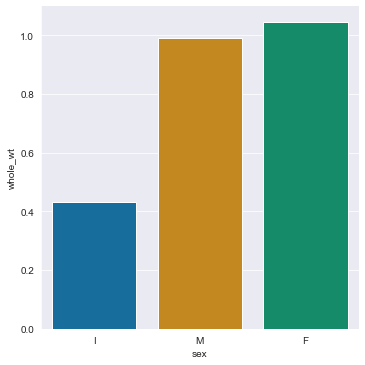

In [74]:
#Barchat of sex by weight
sns.catplot(data=data, x='sex', y='whole_wt', kind='bar', ci=None, order=['I','M','F'])
plt.show()

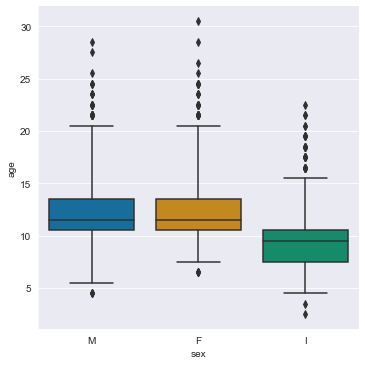

In [75]:
#Boxplot of sex distributed by age
sns.catplot(x='sex', y='age', data=data, kind='box', whis=[0.25, 97.5])
plt.show()

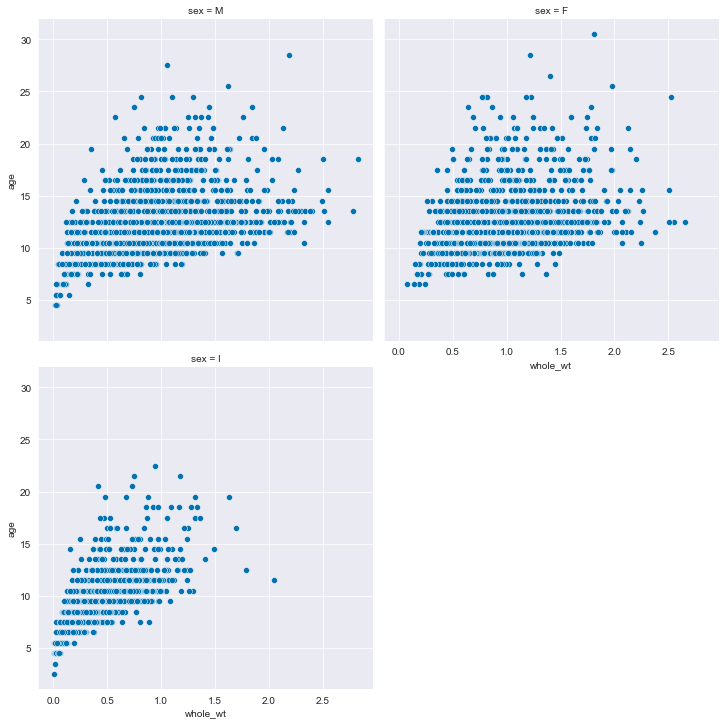

In [76]:
#Scatter plot of whole_wt against age 
sns.relplot(x='whole_wt', y='age', data=data, col='sex', col_wrap=2)
plt.show()

**Observations**
* The average weight of infant is below 0.5
* The average weight of male is below 1.0
* The average weight of female is above 1
* The females are the heaviest
* At 95% confidence interval
	* The age range of infant is 0-16 years
	* The age range of male is 6-25 years
    * The age of the male is more spread
    * The median of male and female is almost the same.
	* The age range of female is 8-29 years
* For each sex category the relationship between weight and age is positively correlated i.e as age increases weight increases and vice versa

# Data preprocessing

Since all the data are already in the right type
* We need to drop the rings from the data since we are trying to predict age without having to get the rings
* Then we seperate the targets from the features
* The next step is to split the data into train and test set
* We then reduce the effects of outliers on the data by imputing values where there are outliers

In [77]:
#We drop rings from the data
data = data.drop('rings', axis=1)

#Seperating the features and the target
inputs = data.drop('age', axis=1)
targets = data.loc[:,['age']]

#Split dataset into train and test
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(
                                                                          inputs,
                                                                          targets,
                                                                          test_size=0.2,
                                                                          random_state=1,
                                                                          shuffle=True

)
print(inputs_train.shape, targets_train.shape)

(3341, 8) (3341, 1)


In [78]:
# Taking care of the outliers in each column
#We create a function that can remove outliers
def outlier_imputer(df, col):
    percentile_2= np.quantile(df[col], 0.025)
    df[col] = np.where(df[col]<percentile_2, percentile_2, df[col])
    percentile_97= np.quantile(df[col], 0.975)
    df[col] = np.where(df[col]>percentile_97, percentile_97, df[col])

#Imputing where there is outliers
columns = inputs_train.drop('sex', axis=1).columns
for col in columns:
    outlier_imputer(inputs_test, col)
    outlier_imputer(inputs_train, col)

Checking how high the features are correlated

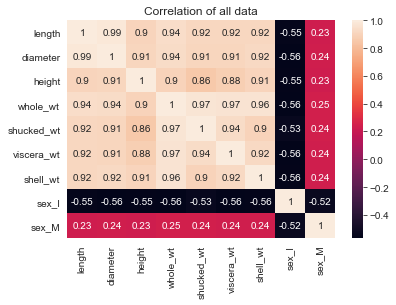

In [79]:
#Creating dummy variables 
inputs_train = pd.get_dummies(inputs_train, drop_first=True)

#Checking the correlation
sns.heatmap(inputs_train.corr(), annot=True)
plt.title('Correlation of all data')
plt.show()

**Note**  
Most of the data are strongly positively correlated, hence to get an accurate prediction, we must decorrelate the data and also scale it. We do this by creating a pipeline that will perfrom both task for us.

### Creating a pipeline

In [80]:
# Import the functions needed from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
# Instantiate StandardScaler, PCA as scaler and pca respectively
scaler = StandardScaler()
pca = PCA()
# Create the pipeline using scaler and the pca object
pipeline = make_pipeline(scaler, pca)
# Fit and transform the model
inputs_train_scaled = pipeline.fit_transform(inputs_train)
inputs_train_scaled.shape

(3341, 9)

# Creating the model

We have preprocess the data, scaled it and decorrelate it, now we have to find the model that predicts the age accurately without over fitting.

**We are going to fit the data using the following models:**
* RandomForestRegressor()
* GradientBoostingRegressor()
* AdaBoostRegressor()
* LinearRegression()
* Lasso()
* Ridge()

**Then we perform cross-validation using cross_val_score()**
* We evaluate the model using the following metrics
	* root_mean_squared_error
    * $R^2$ score

In [81]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate RandomForest as 'rf' with 500 estimators
rf = RandomForestRegressor(
                           max_depth = 4,
                           max_features = 'auto',
                           min_samples_leaf = 0.12,
                           n_estimators =500,
                           random_state = 1)

# Fit rf to the training set
rf.fit(inputs_train_scaled, targets_train)
# Predict the targets of the training set
target_pred = rf.predict(inputs_train_scaled)
# Evaluate the model using RMSE and r2_scores
rmse_score = np.round(mean_squared_error(target_pred, targets_train)**0.5, 3)
r2_scores= np.round(r2_score(targets_train, target_pred), 3)
# Print out the scores
print(rmse_score, r2_scores)

2.485 0.414


In [82]:
# Import the GradientBoosting and AdaBoost Regressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
# Instantiate the GradientBooostingRegressor as 'gf' with 400 estimators
gf = GradientBoostingRegressor(
							   learning_rate = 0.1,
                               max_depth= 1, 
                               max_features = 'auto',
                               min_samples_leaf = 5,
                               min_samples_split = 2,
                               n_estimators = 400,
                               random_state = 1

)
# Fit the model to the training set
gf.fit(inputs_train_scaled, targets_train)
# Predict the target of the training dataset
train_pred = gf.predict(inputs_train_scaled)
# Calculating the r2_score and RMSE
r2_scores= np.round(r2_score(targets_train, train_pred), 3)
rmse_score = np.round((mean_squared_error(targets_train, train_pred))**0.5, 3)
#Print the values
print(rmse_score, r2_scores)

2.018 0.614


In [83]:
# Instantiate the AdaBoostRegressor as 'ads' with 100 estimators
ads = AdaBoostRegressor(
                        n_estimators=100,
                        random_state=1,
                        learning_rate = 0.1
)
# Fit the model to the training dataset
ads.fit(inputs_train_scaled, targets_train)
# Predict the targets of the training dataset
train_pred = ads.predict(inputs_train_scaled)
# Evaluate the model using the r2_score and rmse_score
r2_scores= np.round(r2_score(targets_train, train_pred), 3)
rmse_score = np.round((mean_squared_error(targets_train, train_pred))**0.5, 3)
# Print out the values
print(rmse_score, r2_scores)

2.263 0.514


In [84]:
# Import the LinearRegression model from sklearn.linear_model
from sklearn.linear_model import LinearRegression
# Instantiate the LinearRegression as 'lr'
lr = LinearRegression()
# Fit the model to the training dataset
lr.fit(inputs_train_scaled, targets_train)
# Predict the training targets
train_pred = lr.predict(inputs_train_scaled)
# Evaluate the model using the r2_score amd rmse_score
r2_scores= np.round(r2_score(targets_train, train_pred), 3)
rmse_score = np.round((mean_squared_error(targets_train, train_pred))**0.5, 3)
# Print out the values
print(rmse_score, r2_scores)

2.171 0.553


In [85]:
# Importing the model
from sklearn.linear_model import Lasso
# Instantiate the Lasso as 'ls'
ls = Lasso()
# Fit the model to the training dataset
ls.fit(inputs_train_scaled, targets_train)
# Predict the targets of the training dataser
train_pred = ls.predict(inputs_train_scaled)
# Evaluate the model using r2_score and rmse_score
r2_scores= np.round(r2_score(targets_train, train_pred), 3)
rmse_score = np.round((mean_squared_error(targets_train, train_pred))**0.5, 3)
# Print out the scores
print(rmse_score, r2_scores)

2.667 0.325


In [86]:
# Import the model
from sklearn.linear_model import Ridge
# Instantiate Ridge as 'rd'
rd = Ridge()
# Fit the model to the training dataset
rd.fit(inputs_train_scaled, targets_train)
# Predict the targets of the training datasets
train_pred = ls.predict(inputs_train_scaled)
# Get the metrics
r2_scores= np.round(r2_score(targets_train, train_pred), 3)
rmse_score = np.round((mean_squared_error(targets_train, train_pred))**0.5, 3)
# Print out the values
print(rmse_score, r2_scores)

2.667 0.325


In [87]:
models = [(rf, 'RandomForestRegressor'),(gf, 'GradientBoostingRegressor'), (ads, 'AdaBoostRegressor'),
          (lr, 'LinearRegression'),(ls, 'Lasso'), (rd, 'Ridge')]
from sklearn.model_selection import cross_val_score
model_scores = {}
for model, name in models:
    cross_val = -cross_val_score(
                                estimator=model,
                                X=inputs_train_scaled,
                                y=targets_train,
                                scoring='neg_mean_squared_error',
                                n_jobs=-1
    )
    model_scores[name] = (cross_val**0.5).mean()

model_scores    

{'RandomForestRegressor': 2.5026663182466864,
 'GradientBoostingRegressor': 2.1399310300709047,
 'AdaBoostRegressor': 2.349167632667287,
 'LinearRegression': 2.180288892153526,
 'Lasso': 2.668574263082074,
 'Ridge': 2.1801762657869257}

**Observations**
From the models and cross-validations
* Only the Ridge() model didn't over fit
* Hence we use the Ridge() to predict new data and also use it to predict the test data set
* If it predicts the test data set well, we can conclude that we can predict the age of abalone using its physical attributes
* We use RandomForestRegressor() to determine the features that are better predictors of age

## Testing the model

**Note**

For us to get an accurate prediction using the model, they must be in the same format with the training data, hence we must impute dummy variables for the categorical variable, then scale and decorrelate the data by passing it into the pipeline created.

In [88]:
inputs_test=pd.get_dummies(inputs_test, drop_first=True)
inputs_test_scaled = pipeline.fit_transform(inputs_test)
inputs_test_scaled.shape

(836, 9)

In [89]:
#Test the model
# Predict the age
test_pred = rd.predict(inputs_test_scaled)
# Evaluate the metrics
rmse_score_pred = np.round((mean_squared_error(targets_test, test_pred))**0.5, 3)
r2_score_pred = np.round(r2_score(targets_test, test_pred), 3)
print(rmse_score_pred, r2_score_pred)

2.557 0.332


**Note**  

The model perform better on test dataset, which means we can predict the test set with great accuracy
An rmse_score of 2.557 means for each age predicted from the model we get a prediction that is 
2.557(rings+ 1.5) off the actual age.

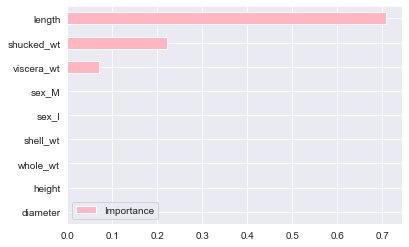

In [90]:
# Creating a dataframe for model importance
importance_rf = pd.DataFrame(rf.feature_importances_, index = inputs_train.columns)
# Rename index
importance_rf.columns = ['Importance']
#Sort the values
importance_rf_sorted = importance_rf.sort_values(by='Importance', ascending=True)
importance_rf_sorted.plot(kind='barh', color='lightpink')
plt.show()

**Note**  

* The best predictors of age are length, shucked_wt and viscera_wt.  
	* Where length is the most important predictor.